In [1]:
import os
from pyprojroot import here
project_root = here()
print(f"Changing working directory to {project_root}")
os.chdir(project_root)

Changing working directory to /home/ptr/workspace/technikum/technikum-big-data


# Exploritory Data Analysis

This notebooks loads the dataset and performs some statistical and visual analysis of the Unihan data.

In [2]:
from bigchina import load_data

dataframe = load_data()

Reading unihan files...
Spreading Unihan columns...
Encoding Unicode notations...
Splitting radical column...
Reading HSK files...
Merging Unihan with HSK dataframe...


In [3]:
desired_columns = [
    "glyph",
    "unicode",
    "kDefinition",
    "radical",
    "additional_strokes",
    "simplified_radical_indicator",
    "simplified_variant",
    "traditional_variant",
    "semantic_variant",
    "specialized_variant",
    "z_variant",
    "spoofing_variant",
    "compatibility_variant",
    "kTotalStrokes",
    "kFrequency",
    "hsk_level",
    "kGradeLevel",
    "kMandarin",
    "kHanyuPinlu",
    "kHanyuPinyin",
    "kCantonese",
    "kHangul",
    "kKorean",
    "kJapaneseKun",
    "kJapaneseOn",
    "kVietnamese",
    "kTang",
    "kTGHZ2013",
    "kXHC1983",
    "kAccountingNumeric",
    "kOtherNumeric",
    "kPrimaryNumeric",
]

dataframe.sort_values(
    ["hsk_level", "kFrequency", "additional_strokes", "radical"], inplace=True
)

dataframe = dataframe[desired_columns]

In [4]:
dataframe

,glyph,unicode,kDefinition,radical,additional_strokes,simplified_radical_indicator,simplified_variant,traditional_variant,semantic_variant,specialized_variant,...,kKorean,kJapaneseKun,kJapaneseOn,kVietnamese,kTang,kTGHZ2013,kXHC1983,kAccountingNumeric,kOtherNumeric,kPrimaryNumeric
72397,一,U+4E00,"one; a, an; alone",1,0,False,NaN,NaN,弌 壹,壹,...,IL,HITOTSU HITOTABI HAJIME,ICHI ITSU,nhất,*qit qit,430.150:yī,1351.020:yī 1360.040:yí 1368.160:yì,NaN,NaN,1
72583,人,U+4EBA,man; people; mankind; someone else,9,0,False,NaN,NaN,亻,NaN,...,IN,HITO,JIN NIN,nhân,*njin njin,313.110:rén,0959.010:rén,NaN,NaN,NaN
75252,大,U+5927,"big, great, vast, large, high",37,0,False,NaN,NaN,NaN,NaN,...,TAY THAY,OOKII HAJIME OOINI,TAI DAI TA,đại,*dhɑ̀i,062.050:dà 063.030:dài,0194.010:dà 0205.010:dài,NaN,NaN,NaN
75805,子,U+5B50,"offspring, child; fruit, seed of; 1st terrestr...",39,0,False,NaN,NaN,只,NaN,...,CA,KO MI OTOKO,SHI SU,tí,*tziə̌,491.190:zǐ,1531.040:zǐ,NaN,NaN,NaN
75996,小,U+5C0F,"small, tiny, insignificant",42,0,False,NaN,NaN,NaN,NaN,...,SO,CHIISAI KO O,SHOU,tiểu,*siɛ̌u,403.170:xiǎo,1265.120:xiǎo,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42661,𪚥,U+2A6A5,NaN,212,48,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64672,𰻞,U+30EDE,biangbiang noodles,162,54,False,𰻝,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,𠔻,U+2053B,NaN,134,58,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64790,𰽔,U+30F54,NaN,167,68,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Basic Statistics


### Distribution per HSK level

How many new characters does one have to know for each HSK test level?

<AxesSubplot:>

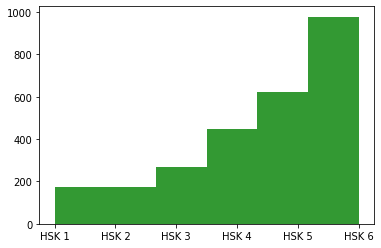

In [5]:
hsk = dataframe[dataframe.hsk_level.notnull()][["glyph", "hsk_level"]]
hsk.hsk_level = "HSK " + hsk.hsk_level.astype("str")

hsk.hsk_level = hsk.hsk_level.astype("category")

hsk.hsk_level.hist(bins=6, alpha=0.8, color="green", grid=False)

In [6]:
import pandas as pd
from plotnine import *
from plotnine.data import mtcars

%matplotlib inline

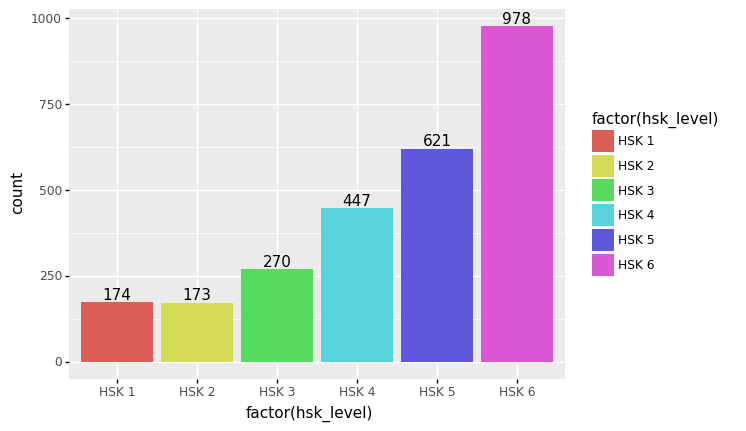

<ggplot: (8784695720677)>

In [7]:
(ggplot(hsk, aes('factor(hsk_level)', fill='factor(hsk_level)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     va='bottom'
 )
)

In [8]:
hsk.groupby("hsk_level").sum()

,glyph
hsk_level,
HSK 1,一人大子小工生电了天本上下个对有不中他们出去同吗在多好年我时来的会果现看这那你和国学是很能前...
HSK 2,也可为以因知要过问所还但真站到得然就意新道最已手日比白考色走身长门非正从公外它次男边务场每虽...
HSK 3,心文用而自成发地如当定法信提力又口山己才方片目行音风马必久元办化头市平求重难加卡向安更李画直...
HSK 4,无章之交何入士支由至言金引民区及反另台处失收此死究观计队专功各合式改社美讨任份传光全则否林研...
HSK 5,王立竹龙未义权代兄类军华形念投政版设似战神组英制品哈型档独统装造曾器土木甲石血青鬼巴良升古布...
HSK 6,讯央呵若陈啦湾田仁曲吉攻亦协君皆野宗扁波罢佳哇奏帝策蛮铭剑哦欲爽莫逢啥堂斯督罪诸援湖磁缘嘛暴...


<AxesSubplot:xlabel='hsk_level'>

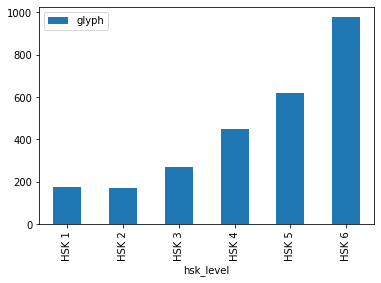

In [9]:
hsk.groupby("hsk_level").count().plot.bar()

## Distribution per Grade level

How many new characters does one have to know for each Grade level?

kGradeLevel is the primary grade in the Hong Kong school system by which a student is expected to know the character.

In [11]:
grade = dataframe[dataframe.kGradeLevel.notnull()][["glyph", "kGradeLevel", "hsk_level"]]

grade

,glyph,kGradeLevel,hsk_level
72397,一,1,1
72583,人,1,1
75252,大,1,1
75805,子,1,1
75996,小,1,1
...,...,...,...
81095,濺,5,<NA>
74610,嚥,5,<NA>
90431,鑲,6,<NA>
81183,灒,3,<NA>


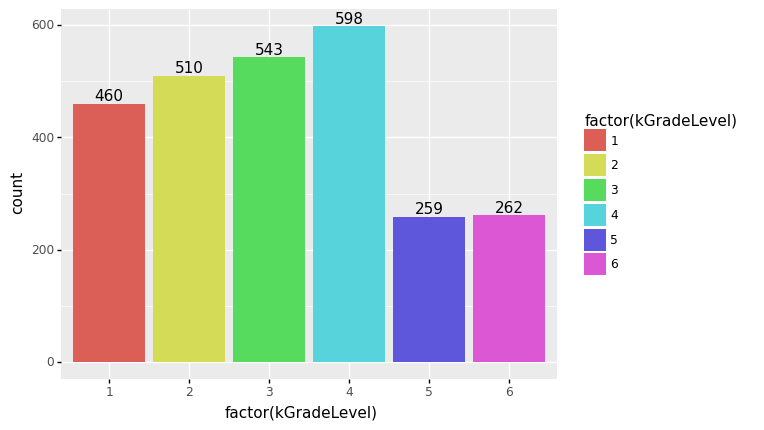

<ggplot: (8784695432226)>

In [12]:
(ggplot(grade, aes('factor(kGradeLevel)', fill='factor(kGradeLevel)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     va='bottom'
 )
)

Unlike as the HSK levels, here the first grades already have to know a lot of characters.
Starting from the fifth level, the number of new characters one student has to learn decreases drastically from 598 to only 259.

In [13]:
dataframe[dataframe.kGradeLevel == "5"]

,glyph,unicode,kDefinition,radical,additional_strokes,simplified_radical_indicator,simplified_variant,traditional_variant,semantic_variant,specialized_variant,...,kKorean,kJapaneseKun,kJapaneseOn,kVietnamese,kTang,kTGHZ2013,kXHC1983,kAccountingNumeric,kOtherNumeric,kPrimaryNumeric
84424,系,U+7CFB,"system; line, link, connection",120,1,False,NaN,係 繫,NaN,NaN,...,KYEY,TSUNAGU,KEI,hệ,NaN,"158.020:jì 395.020,395.030,395.040,395.050:xì",0535.060:jì 1235.160:xì,NaN,NaN,NaN
90892,阿,U+963F,prefix for people's names; used in translitera...,170,5,False,NaN,NaN,NaN,啊,...,A OK,KUMA OMONERU O,A,NaN,qɑ,001.020:ā 086.010:ē,0001.010:ā 0002.081:a 0282.010:ē,NaN,NaN,NaN
85271,聊,U+804A,"somewhat, slightly, at least",128,5,False,NaN,NaN,NaN,NaN,...,LYO,ISASAKA,RYOU,NaN,leu,222.080:liáo,0710.100:liáo,NaN,NaN,NaN
87462,裙,U+88D9,"skirt, apron, petticoat",145,7,False,NaN,NaN,帬 裠,NaN,...,KWUN,MOSURI,KUN,quần,ghiuən,311.120:qún,0953.010:qún,NaN,NaN,NaN
73907,另,U+53E6,"another, separate, other",30,2,False,NaN,NaN,NaN,NaN,...,LYENG,WAKARERU SAKU BETSUNO BETSUNI,REI RYAU,lánh,NaN,227.100:lìng,0723.020:lìng,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74388,嗇,U+55C7,"miserly, thrifty, stingy; stopped up, constipated",30,10,False,啬,NaN,NaN,NaN,...,SAYK,OSHIMU YABUSAKA,SHOKU,NaN,NaN,NaN,0989.091:sè,NaN,NaN,NaN
75129,墬,U+58AC,"to fall, sink",32,12,False,NaN,NaN,NaN,NaN,...,NaN,NaN,CHI,NaN,NaN,NaN,0239.080:dì,NaN,NaN,NaN
80947,潦,U+6F66,to flood; a puddle; without care,85,12,False,NaN,NaN,NaN,澇,...,LYO,NIWATAZUMI,ROU,lẻo,lɑ̀u,222.150:liáo,0678.060:lǎo 0711.120:liǎo,NaN,NaN,NaN
81095,濺,U+6FFA,"sprinkle, spray; spill, splash",85,15,False,溅,NaN,NaN,NaN,...,CHEN,SOSOGU,SEN,NaN,tziɛ̀n,NaN,0555.021:jiàn,NaN,NaN,NaN


## Distrubution kFrequency

The kFrequency features is 	a rough frequency measurement for the character based on analysis of traditional Chinese USENET postings. Characters with a kFrequency of 1 are the most common, those with a kFrequency of 2 are less common, and so on, through a kFrequency of 5.

In [14]:
frequent = dataframe[dataframe.kFrequency.notnull()][["glyph", "kFrequency"]]
frequent

,glyph,kFrequency
72397,一,1
72583,人,1
75252,大,1
75805,子,1
75996,小,1
...,...,...
79843,欖,5
83111,矚,5
84841,纜,5
88353,豔,5


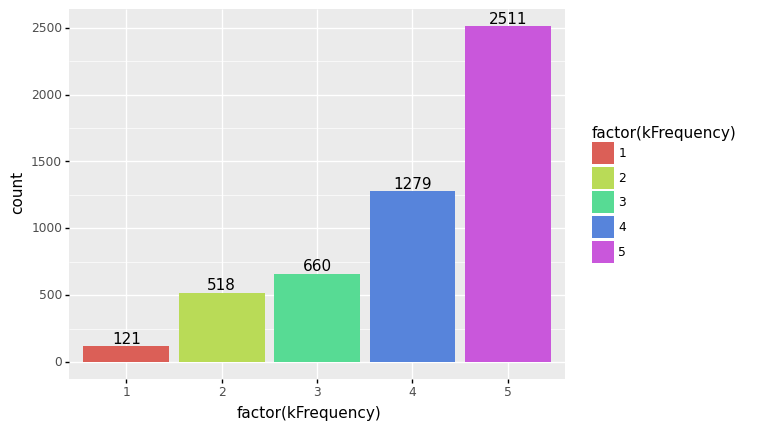

<ggplot: (8784695427916)>

In [15]:
(ggplot(frequent, aes('factor(kFrequency)', fill='factor(kFrequency)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     va='bottom'
 )
)

Number of characters with the most frequent value is only 121.

### Correlation between hsk_level and kGradeLevel

Since both levels divide the characters into levels of difficulty, it can be assumed that the two features correlate. This can be easily visualized by using a scatter plot.

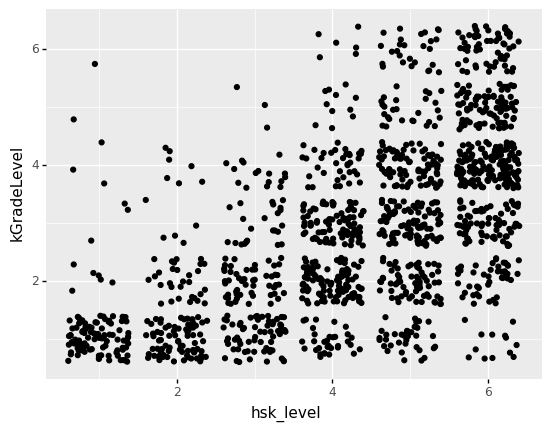

<ggplot: (8784658243386)>

In [16]:
df = grade[grade.hsk_level.notnull()].copy()
df.hsk_level = df.hsk_level.astype("int")
df.kGradeLevel = df.kGradeLevel.astype("int")
df


p = ggplot(aes(x='hsk_level', y='kGradeLevel'), df)
p + geom_jitter()

Most of the Characters that are classified as hsk 1 are indeed also kGradeLevel 1, but starting from the next levels it varies alot.

In [17]:
df.corr()

,kGradeLevel,hsk_level
kGradeLevel,1.000000,0.614729
hsk_level,0.614729,1.000000


Overall, the two features have a correlation coefficient of about 0.61, which indicates a moderate correlation.

### Most correlated features



In [18]:
df = dataframe[["hsk_level", "kGradeLevel", "kFrequency", "radical", "additional_strokes", "kTotalStrokes"]].copy()

df.dropna(inplace=True)

df = df.astype({
    'hsk_level': 'int', 
    'kGradeLevel': 'int',
    'kFrequency': 'int',
    'radical': 'int',
    'additional_strokes': 'int',
    'kTotalStrokes': 'int',
})

In [19]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,hsk_level,kGradeLevel,kFrequency,radical,additional_strokes,kTotalStrokes
hsk_level,1.000000,0.615112,0.670725,0.096624,0.310550,0.304622
kGradeLevel,0.615112,1.000000,0.535195,0.058952,0.271094,0.259285
kFrequency,0.670725,0.535195,1.000000,0.124137,0.351974,0.358777
radical,0.096624,0.058952,0.124137,1.000000,0.015561,0.383127
additional_strokes,0.310550,0.271094,0.351974,0.015561,1.000000,0.876020
kTotalStrokes,0.304622,0.259285,0.358777,0.383127,0.876020,1.000000


As can be seen, the greatest correlation is between the hsk_Level and the kFrequency characteristic.
This makes sense because the HSK should cover the most common characters first, as these are the most used ones.

In [20]:
df.kFrequency.unique()

array([1, 2, 3, 4, 5])

## Radical number distrubution

Each chinese character is associated with a radical number. In total there are 214 Kangxi Radicals:

In [83]:
highest_radical_number = dataframe.radical.max()
highest_radical_number

214

In [53]:
radicals_count = dataframe[["glyph", "radical"]].groupby("radical").count()
radicals_count.rename(columns={"glyph": "radical_count"}, inplace=True)

<AxesSubplot:xlabel='radical'>

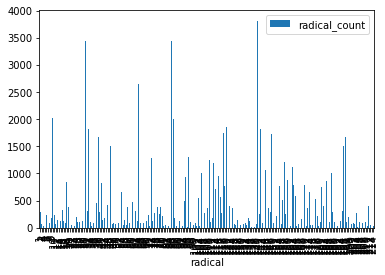

In [54]:
radicals_count.plot.bar()

The distribution looks quite random, but if sorted a new pattern is visible:

<AxesSubplot:>

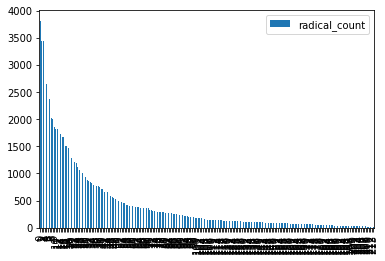

In [63]:
radicals_count.sort_values("radical_count", ascending=False).reset_index().plot.bar(y="radical_count")

Now a nice curve can be recognized. 
The most common radical has about 400 characters and the least common a lot less.


To analyse this curve further, more processing steps can be performed:

In [64]:
max = radicals_count["radical_count"].max()
min = radicals_count["radical_count"].min()

print(f"Most common radical has {max} characters associated with it.")
print(f"Least common radical has {min} characters associated with it.")

Most common radical has 3820 characters associated with it.
Least common radical has 12 characters associated with it.


In [94]:
cummulated = radicals_count.sort_values("radical_count", ascending=False).cumsum()
cummulated = cummulated.rename(columns={"radical_count": "commulative_sum"})

total_number = radicals_count.radical_count.sum()

cummulated["commulative_sum_perc"] = cummulated.commulative_sum / total_number
cummulated.reset_index(inplace=True)

cummulated.index.name='radical_rank'
cummulated.index += 1 
cummulated.reset_index(inplace=True)

cummulated["radical_rank_perc"] = cummulated.radical_rank / highest_radical_number

cummulated

,radical_rank,radical,commulative_sum,commulative_sum_perc,radical_rank_perc
0,1,140,3820,0.040700,0.004673
1,2,30,7267,0.077425,0.009346
2,3,85,10707,0.114077,0.014019
3,4,75,13956,0.148693,0.018692
4,5,64,16606,0.176927,0.023364
...,...,...,...,...,...
209,210,136,93796,0.999339,0.981308
210,211,192,93814,0.999531,0.985981
211,212,138,93832,0.999723,0.990654
212,213,204,93846,0.999872,0.995327


Text(0, 0.5, 'Coverage of chinese characters')

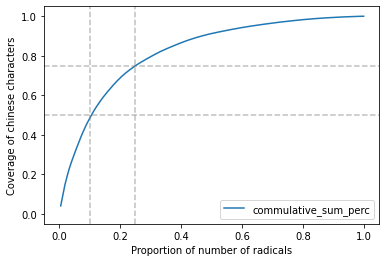

In [116]:
import matplotlib.pyplot as plt

cummulated.plot.line(x="radical_rank_perc", y="commulative_sum_perc")
plt.axline((0.25, 0), (0.25, 1), color="gray", linestyle='--', alpha=0.5)
plt.axline((0, 0.75), (1, 0.75), color="gray", linestyle='--', alpha=0.5)

plt.axline((0.10, 0), (0.10, 1), color="gray", linestyle='--', alpha=0.5)
plt.axline((0, 0.5), (1, 0.5), color="gray", linestyle='--', alpha=0.5)

plt.xlabel('Proportion of number of radicals')
plt.ylabel('Coverage of chinese characters')

Text(0, 0.5, 'Coverage of chinese characters')

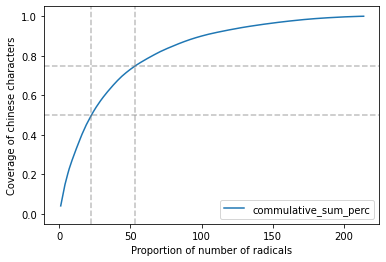

In [124]:
import matplotlib.pyplot as plt

cummulated.plot.line(x="radical_rank", y="commulative_sum_perc")
plt.axline((53, 0), (53, 1), color="gray", linestyle='--', alpha=0.5)
plt.axline((0, 0.75), (1, 0.75), color="gray", linestyle='--', alpha=0.5)

plt.axline((22, 0), (22, 1), color="gray", linestyle='--', alpha=0.5)
plt.axline((0, 0.5), (1, 0.5), color="gray", linestyle='--', alpha=0.5)

plt.xlabel('Proportion of number of radicals')
plt.ylabel('Coverage of chinese characters')

10% (about 22/214) of all radicals account for 50% of all chinese characters

25% (about 53/214) of all radicals account for 75% of all chinese characters.